In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


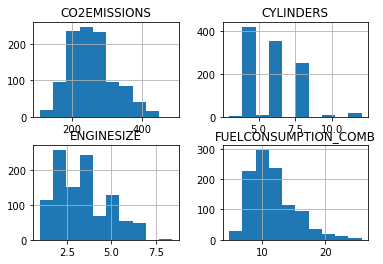

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

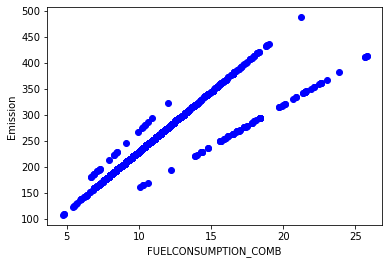

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

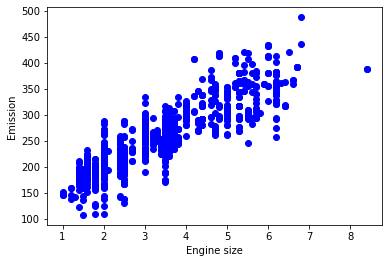

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

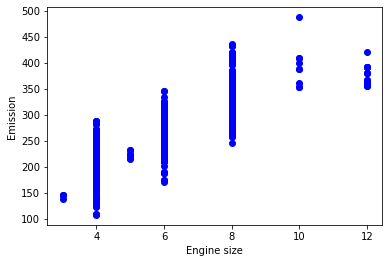

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
msk = np.random.rand(len(df)) < 0.8
msk

array([False, False, False, ...,  True,  True,  True])

In [11]:
len(df)

1067

In [12]:
len(msk)

1067

In [13]:
np.random.rand(len(df))

array([0.51951866, 0.79926437, 0.46541571, ..., 0.52210535, 0.24968643,
       0.66285158])

In [14]:
train = cdf[msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
8,3.7,6,11.6,267
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [15]:
test = cdf[~msk]
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
7,3.7,6,11.1,255
19,2.0,4,8.8,202
...,...,...,...,...
1043,1.8,4,8.6,198
1046,2.5,5,9.8,225
1049,2.0,4,6.8,184
1051,2.0,4,10.7,246


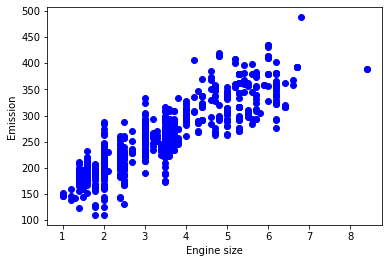

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn import linear_model

In [18]:
train['ENGINESIZE']

3       3.5
4       3.5
5       3.5
6       3.5
8       3.7
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 843, dtype: float64

In [19]:
train[['ENGINESIZE']]

,ENGINESIZE
3,3.5
4,3.5
5,3.5
6,3.5
8,3.7
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [20]:
np.asanyarray(train[['ENGINESIZE']])

array([[3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [2.4],
       [2.4],
       [3.5],
       [5.9],
       [5.9],
       [4.7],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [2. ],
       [3. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [6. ],
       [6. ],
       [4. ],
       [6. ],
       [6. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
      

In [21]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [25]:
print(train_x.shape)
print(train_y.shape)

(843, 1)
(843, 1)


In [22]:
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.97143309]]
Intercept:  [125.81329782]


Text(0, 0.5, 'Emission')

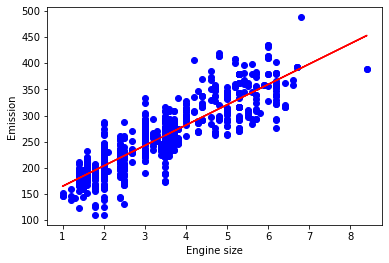

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [37]:
from sklearn.metrics import r2_score

In [38]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [40]:
test_y_hat = regr.predict(test_x)
test_y_hat

array([[183.522625  ],
       [310.89781144],
       [203.42499788],
       [243.22974364],
       [243.22974364],
       [203.42499788],
       [243.22974364],
       [290.99543856],
       [330.80018432],
       [330.80018432],
       [290.99543856],
       [283.03448941],
       [362.64398093],
       [203.42499788],
       [243.22974364],
       [203.42499788],
       [203.42499788],
       [203.42499788],
       [243.22974364],
       [298.95638771],
       [298.95638771],
       [243.22974364],
       [298.95638771],
       [298.95638771],
       [298.95638771],
       [243.22974364],
       [203.42499788],
       [243.22974364],
       [203.42499788],
       [243.22974364],
       [243.22974364],
       [267.1125911 ],
       [179.54215043],
       [267.1125911 ],
       [219.34689619],
       [219.34689619],
       [267.1125911 ],
       [203.42499788],
       [267.1125911 ],
       [370.60493008],
       [370.60493008],
       [370.60493008],
       [370.60493008],
       [179

In [26]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_hat) )

NameError: name 'test_y_hat' is not defined